In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy.stats import sem

In [2]:
parkingcitation_df = pd.read_csv("parking-citations.csv", low_memory=False)
parkingcitation_df.head()

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,1103341116,2015-12-21T00:00:00,1251.0,NaN,NaN,CA,200304.0,NaN,HOND,PA,GY,13147 WELBY WAY,01521,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
1,1103700150,2015-12-21T00:00:00,1435.0,NaN,NaN,CA,201512.0,NaN,GMC,VN,WH,525 S MAIN ST,1C51,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
2,1104803000,2015-12-21T00:00:00,2055.0,NaN,NaN,CA,201503.0,NaN,NISS,PA,BK,200 WORLD WAY,2R2,2.0,8939,WHITE CURB,58.0,6439997.9,1802686.4
3,1104820732,2015-12-26T00:00:00,1515.0,NaN,NaN,CA,NaN,NaN,ACUR,PA,WH,100 WORLD WAY,2F11,2.0,000,17104h,NaN,6440041.1,1802686.2
4,1105461453,2015-09-15T00:00:00,115.0,NaN,NaN,CA,200316.0,NaN,CHEV,PA,BK,GEORGIA ST/OLYMPIC,1FB70,1.0,8069A,NO STOPPING/STANDING,93.0,99999.0,99999.0


In [3]:
# parkingcitation_df.dtypes

In [4]:
#Retrieving dates in common format
dates = parkingcitation_df["Issue Date"].str.split("T", n=1, expand = True)
parkingcitation_df["Issue Date"] = dates[0]

In [5]:
#Show new parking citation df
parkingcitation_df.head()
# parkingcitation_df_violation1 = parkingcitation_df[parkingcitation_df["Violation code"]=="80.70"]
# parkingcitation_df_violation1

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,1103341116,2015-12-21,1251.0,NaN,NaN,CA,200304.0,NaN,HOND,PA,GY,13147 WELBY WAY,01521,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
1,1103700150,2015-12-21,1435.0,NaN,NaN,CA,201512.0,NaN,GMC,VN,WH,525 S MAIN ST,1C51,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
2,1104803000,2015-12-21,2055.0,NaN,NaN,CA,201503.0,NaN,NISS,PA,BK,200 WORLD WAY,2R2,2.0,8939,WHITE CURB,58.0,6439997.9,1802686.4
3,1104820732,2015-12-26,1515.0,NaN,NaN,CA,NaN,NaN,ACUR,PA,WH,100 WORLD WAY,2F11,2.0,000,17104h,NaN,6440041.1,1802686.2
4,1105461453,2015-09-15,115.0,NaN,NaN,CA,200316.0,NaN,CHEV,PA,BK,GEORGIA ST/OLYMPIC,1FB70,1.0,8069A,NO STOPPING/STANDING,93.0,99999.0,99999.0


In [6]:
parkingcitation_df.dtypes

Ticket number             object
Issue Date                object
Issue time               float64
Meter Id                  object
Marked Time              float64
RP State Plate            object
Plate Expiry Date        float64
VIN                       object
Make                      object
Body Style                object
Color                     object
Location                  object
Route                     object
Agency                   float64
Violation code            object
Violation Description     object
Fine amount              float64
Latitude                 float64
Longitude                float64
dtype: object

In [7]:
#Create new columnn with Issue Date listed as year and month
parkingcitation_df["month"] = pd.DatetimeIndex(parkingcitation_df["Issue Date"]).month

In [8]:
parkingcitation_df.head()

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,month
0,1103341116,2015-12-21,1251.0,NaN,NaN,CA,200304.0,NaN,HOND,PA,GY,13147 WELBY WAY,01521,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0,12.0
1,1103700150,2015-12-21,1435.0,NaN,NaN,CA,201512.0,NaN,GMC,VN,WH,525 S MAIN ST,1C51,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0,12.0
2,1104803000,2015-12-21,2055.0,NaN,NaN,CA,201503.0,NaN,NISS,PA,BK,200 WORLD WAY,2R2,2.0,8939,WHITE CURB,58.0,6439997.9,1802686.4,12.0
3,1104820732,2015-12-26,1515.0,NaN,NaN,CA,NaN,NaN,ACUR,PA,WH,100 WORLD WAY,2F11,2.0,000,17104h,NaN,6440041.1,1802686.2,12.0
4,1105461453,2015-09-15,115.0,NaN,NaN,CA,200316.0,NaN,CHEV,PA,BK,GEORGIA ST/OLYMPIC,1FB70,1.0,8069A,NO STOPPING/STANDING,93.0,99999.0,99999.0,9.0


In [9]:
parkingcitation_df["year"] = pd.DatetimeIndex(parkingcitation_df["Issue Date"]).year

In [10]:
# parkingcitation_df.head()
parkingcitation_df.dtypes

Ticket number             object
Issue Date                object
Issue time               float64
Meter Id                  object
Marked Time              float64
RP State Plate            object
Plate Expiry Date        float64
VIN                       object
Make                      object
Body Style                object
Color                     object
Location                  object
Route                     object
Agency                   float64
Violation code            object
Violation Description     object
Fine amount              float64
Latitude                 float64
Longitude                float64
month                    float64
year                     float64
dtype: object

In [11]:
# parkingcitation_df.min()
# parkingcitation_df.max()

In [12]:
#Filter data by year
year_df = parkingcitation_df[parkingcitation_df["year"] == 2018.0]
# year_df.sample(20)

In [13]:
#Use groupby to groupby month
month_group_df = year_df.groupby(["month"])
# month_group_df.head()

In [14]:
#Calcuate the monthly revenue from parking citations
monthly_revenue = month_group_df.sum()["Fine amount"]
monthly_revenue = monthly_revenue.reset_index()
monthly_revenue.head()

,month,Fine amount
0,1.0,13066441.0
1,2.0,11628597.0
2,3.0,13544094.0
3,4.0,13276779.0
4,5.0,12779631.0


In [15]:
#Find number of months using unique.()
unique_months = year_df["month"].unique()
# unique_months

In [37]:
#Convert number months to name months
monthly_revenue = monthly_revenue.replace({1.0: "Januaray",
                                           2.0: "February",
                                           3.0: "March",
                                           4.0: "April",
                                           5.0: "May",
                                           6.0: "June",
                                           7.0: "July",
                                           8.0: "August",
                                           9.0: "September",
                                           10.0: "October",
                                           11.0: "November",
                                           12.0: "December"
                                          })
monthly_revenue

,month,Fine amount
0,Januaray,13066441.0
1,February,11628597.0
2,March,13544094.0
3,April,13276779.0
4,May,12779631.0
5,June,11853053.0
6,July,10562092.0
7,August,11935108.0
8,September,9914753.0
9,October,11406979.0


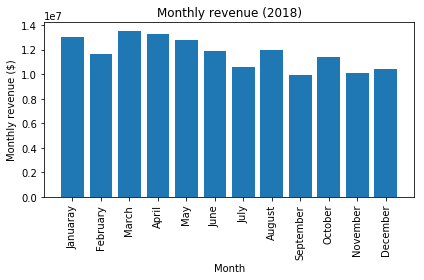

In [42]:
#Create bar graph x = month, y = monthly revenue
plt.bar(monthly_revenue["month"], monthly_revenue["Fine amount"], width = 0.8, align = "center")
# x_axis = np.arange(1,len(unique_months)+1)
# tick_locations = [value for value in x_axis]
plt.xticks(rotation = 'vertical')
#plt.xlim(-0.75, len(x_axis)-0.25)
#plt.ylim(0, max(monthly_revenue["Fine amount"])+5000000)
plt.title("Monthly revenue (2018)")
plt.xlabel("Month")
plt.ylabel("Monthly revenue ($)")
plt.tight_layout()
plt.savefig('monthlyrevenue.png')

In [41]:
#Find number of unique violation codes using unique.()
unique_violations = year_df["Violation code"].unique()
# unique_violations

In [18]:
parking_citation_type = year_df.groupby(["Violation code"])
violation_count = parking_citation_type.count()["Ticket number"]
# violation_count

In [19]:
violation_count = violation_count.reset_index()
# violation_count

In [20]:
violation_count_sort = violation_count.sort_values("Ticket number", ascending = False)
violation_count_sort = violation_count_sort.reset_index(drop=True).loc[0:9,:]
violation_count_sort

,Violation code,Ticket number
0,80.69BS,580848
1,88.13B+,292067
2,80.56E4+,155595
3,80.58L,143105
4,5204A-,123414
5,80.69B,88601
6,80.69C,62677
7,5200,58525
8,80.56E1,39972
9,80.69AP+,35850


In [21]:
#Rename violation codes to names
violation_count_sort = violation_count_sort.replace({"80.69BS": "No parking/Street cleaning", "88.13B+": "Meter expiration", "80.56E4+": "Red zone",
                                    "80.58L": "Preferential parking","5204A-": "Display of tabs", "80.69B": "No parking", "80.69C": "Parked over time limit","5200": "Display of plates","80.56E1": "White zone","80.69AP+": "No stop/No standing"})
                                                     
violation_count_sort

,Violation code,Ticket number
0,No parking/Street cleaning,580848
1,Meter expiration,292067
2,Red zone,155595
3,Preferential parking,143105
4,Display of tabs,123414
5,No parking,88601
6,Parked over time limit,62677
7,Display of plates,58525
8,White zone,39972
9,No stop/No standing,35850


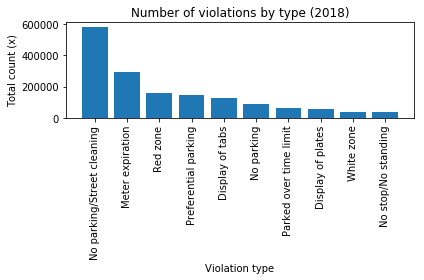

<Figure size 460.8x720 with 0 Axes>

In [33]:
#Create a graph where x is violation type and y is violation type count

plt.bar(violation_count_sort["Violation code"], violation_count_sort["Ticket number"])
# x_axis = np.arange(1, len(violation_count_sort)+1)
# tick_locations = [value for value in x_axis]
plt.xticks(rotation = 'vertical')
#locs, labels = plt.xticks()
#plt.setp(labels, rotation = 45)
# plt.xlim(-0.75, len(x_axis)-0.25)
# plt.ylim(0,max("violation_count")+500)
plt.title("Number of violations by type (2018)")
plt.xlabel("Violation type")
plt.ylabel("Total count (x)")
plt.tight_layout()
plt.figure(figsize=[6.4, 10])
plt.savefig('violation&count.png')

In [23]:
parking_citation_type = year_df.groupby(["Violation code"])
parking_citation_byrevenue = parking_citation_type.sum()["Fine amount"]
# parking_citation_byrevenue

In [24]:
parking_citation_byrevenue_sort = parking_citation_byrevenue.reset_index()
# parking_citation_byrevenue_sort

In [25]:
# parking_citation_byrevenue.head()

In [26]:
parking_citation_byrevenue_sort = parking_citation_byrevenue_sort.sort_values("Fine amount", ascending = False)
parking_citation_byrevenue_sort = parking_citation_byrevenue_sort.reset_index(drop=True).loc[0:9,:]
parking_citation_byrevenue_sort

,Violation code,Fine amount
0,80.69BS,42401904.0
1,88.13B+,18400221.0
2,80.56E4+,14470335.0
3,80.58L,9731140.0
4,80.69B,6467873.0
5,80.70,3819579.0
6,80.69C,3635266.0
7,80.69AP+,3334050.0
8,5204A-,3085388.0
9,80.56E1,2318376.0


In [27]:
#Rename violation codes to names
parking_citation_byrevenue_sort = parking_citation_byrevenue_sort.replace({"80.69BS": "No parking/Street cleaning", "88.13B+": "Meter expiration", "80.56E4+": "Red zone","80.58L": "Preferential parking", "80.69B": "No parking","80.70": "No stopping/Anti-grid lock zone", "80.69C": "Parked over time limit", "80.69AP+": "No stop/No standing", "5204A-": "Display of tabs", "80.56E1": "White zone"})
parking_citation_byrevenue_sort

,Violation code,Fine amount
0,No parking/Street cleaning,42401904.0
1,Meter expiration,18400221.0
2,Red zone,14470335.0
3,Preferential parking,9731140.0
4,No parking,6467873.0
5,No stopping/Anti-grid lock zone,3819579.0
6,Parked over time limit,3635266.0
7,No stop/No standing,3334050.0
8,Display of tabs,3085388.0
9,White zone,2318376.0


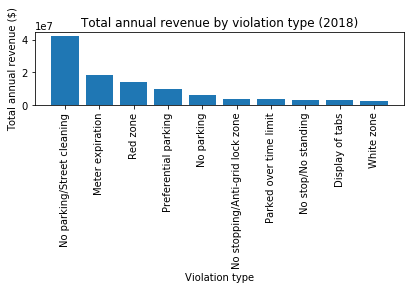

<Figure size 460.8x720 with 0 Axes>

In [45]:
#Create a graph where x is violation type and y is total revenue by fine amount
plt.bar(parking_citation_byrevenue_sort["Violation code"], parking_citation_byrevenue_sort["Fine amount"], width = 0.8, align = "center")
# x_axis = np.arange(1, len(parking_citation_byrevenue_sort)+1)
# tick_locations = [value for value in x_axis]
plt.xticks(rotation = 'vertical')
# plt.xlim(-0.75, len(x_axis)-0.25)
# plt.ylim(0,max("parking_citation_byrevenue")+500)
plt.title("Total annual revenue by violation type (2018)")
plt.xlabel("Violation type")
plt.ylabel("Total annual revenue ($)")
plt.tight_layout()
plt.figure(figsize=[6.4, 10])
plt.savefig('violation&revenue.png')